# Custom OCR - Text Recognition

## Importing Libraries


In [53]:
import tensorflow as tf
from imutils import contours

tf.__version__

'2.16.1'

In [54]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
import matplotlib.pyplot as plt

## Loading Neural Network

In [55]:
network = load_model('Models/network.h5')
network.summary()

/Volumes/STARLAI/Developments/PyCharmProject/Learn OCR/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,470 (540.90 KB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Loading Test Image

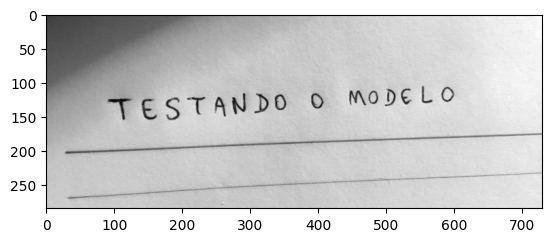

In [56]:
img = cv2.imread('Sources/Images/test-manuscript01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

## Preprocessing Image

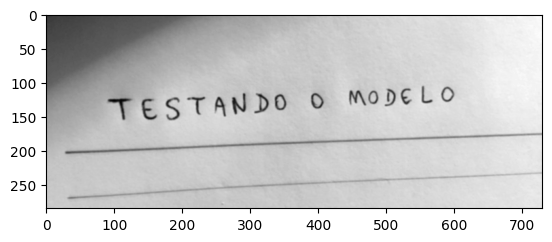

In [57]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur, cmap='gray')
plt.show()

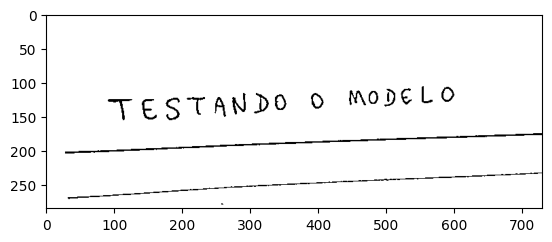

In [58]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive, cmap='gray')
plt.grid(False)
plt.show()

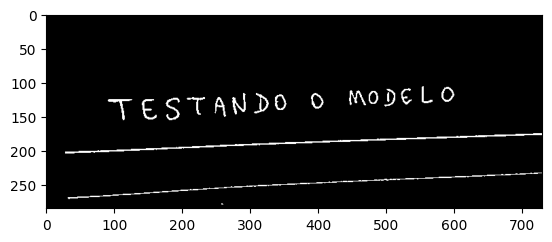

In [59]:
inversion = 255 - adaptive
plt.imshow(inversion, cmap='gray')
plt.grid(False)
plt.show()

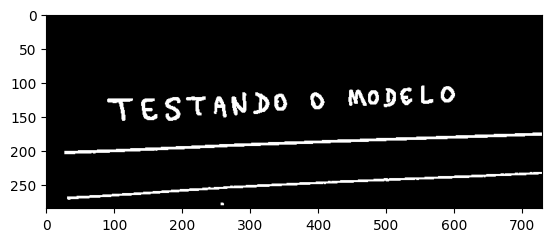

In [60]:
dilation = cv2.dilate(inversion, np.ones((3, 3)))
plt.imshow(dilation, cmap='gray')
plt.grid(False)
plt.show()

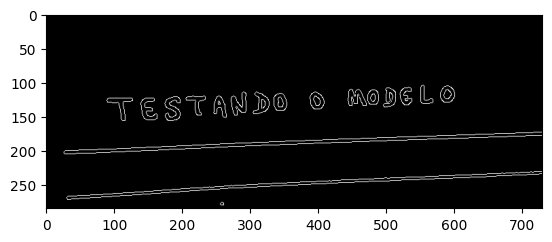

In [61]:
edges = cv2.Canny(dilation, 40, 150)
plt.imshow(edges, cmap='gray')
plt.grid(False)
plt.show()

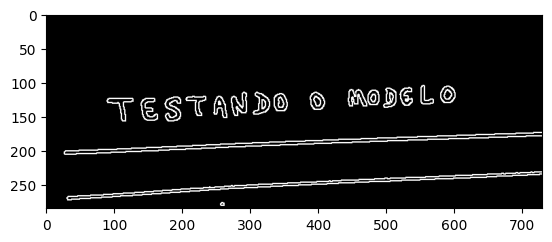

In [62]:
dilation = cv2.dilate(edges, np.ones((2, 2)))
plt.imshow(dilation, cmap='gray')
plt.grid(False)
plt.show()

## Contour Detection

In [63]:
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method = 'left-to-right')[0]
    return conts

In [64]:
conts = find_contours(dilation.copy())
conts[0], len(conts)

(array([[[717, 173]],
 
        [[716, 174]],
 
        [[691, 174]],
 
        [[690, 175]],
 
        [[660, 175]],
 
        [[659, 176]],
 
        [[632, 176]],
 
        [[631, 177]],
 
        [[604, 177]],
 
        [[603, 178]],
 
        [[575, 178]],
 
        [[574, 179]],
 
        [[546, 179]],
 
        [[545, 180]],
 
        [[516, 180]],
 
        [[515, 181]],
 
        [[487, 181]],
 
        [[486, 182]],
 
        [[463, 182]],
 
        [[462, 183]],
 
        [[430, 183]],
 
        [[429, 184]],
 
        [[407, 184]],
 
        [[406, 185]],
 
        [[381, 185]],
 
        [[380, 186]],
 
        [[352, 186]],
 
        [[351, 187]],
 
        [[328, 187]],
 
        [[327, 188]],
 
        [[303, 188]],
 
        [[302, 189]],
 
        [[278, 189]],
 
        [[277, 190]],
 
        [[256, 190]],
 
        [[255, 191]],
 
        [[235, 191]],
 
        [[234, 192]],
 
        [[215, 192]],
 
        [[214, 193]],
 
        [[192, 193]],
 
        [[191, 1

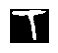

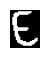

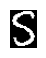

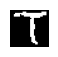

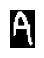

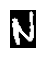

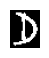

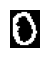

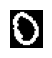

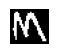

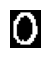

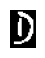

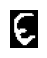

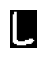

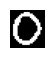

In [65]:
min_w, max_w  = 4, 160
min_h, max_h = 14, 140
img_copy = img.copy()
for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)
    if (min_w <= w <= max_w) and (min_h <= h <= max_h):
        roi = gray[y:y+h, x:x+w]
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        plt.figure(figsize=(0.5,0.5))
        plt.grid(False)
        plt.axis(False)
        plt.imshow(thresh, cmap='gray')
        plt.show()
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 100, 0), 2)

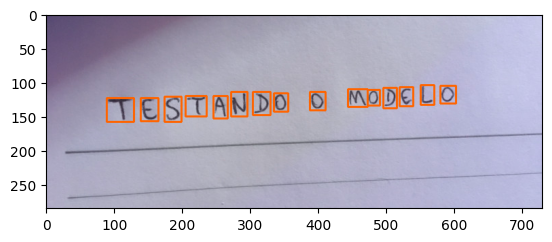

In [66]:
plt.imshow(img_copy, cmap='gray')
plt.grid(False)
plt.show()

## ROI Extraction

In [67]:
def extract_roi(img):
    roi = img[y:y+h, x:x+w]
    return roi

## Thresholding

In [68]:
def thresholding(img):
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    return thresh

## Resizing

In [69]:
def resize_image(img, w, h):
    if w > h:
        resized = imutils.resize(img, width=28)
    else:
        resized = imutils.resize(img, height=28)
    (h, w) = resized.shape
    dX = int(max(0, 28 - w) / 2.0)
    dY = int(max(0, 28 - h) / 2.0)
    
    filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, left=dX, right=dX, borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))
    filled = cv2.resize(filled, (28, 28))
    return filled

246 120 21 33


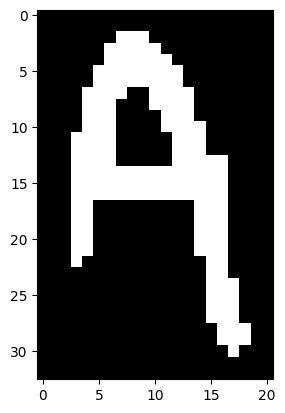

In [70]:
(x, y, w, h) = cv2.boundingRect(conts[6])
print(x, y, w, h)
test_img = thresholding(gray[y:y+h, x:x+w])
plt.imshow(test_img, cmap='gray')
plt.show()


In [71]:
(w, h) = test_img.shape
print(w, h)

33 21


In [72]:
test_img2 = resize_image(test_img, w, h)
print(test_img2.shape)

(28, 28)


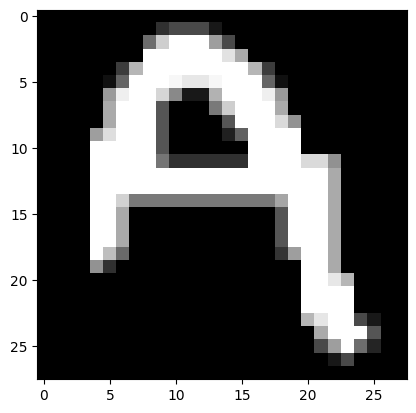

In [73]:
plt.imshow(test_img2, cmap='gray')
plt.show()

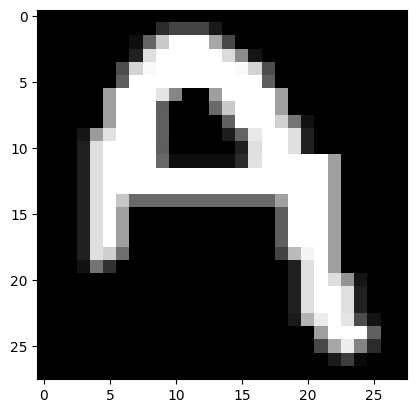

In [74]:
plt.imshow(cv2.resize(test_img, (28, 28)), cmap='gray')
plt.show()

## Normalization

In [75]:
def normalization(img):
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    return img


In [76]:
normalization(test_img2).shape

(28, 28, 1)

## Processing the detections

In [77]:
characters = []

In [78]:
def process_box(gray, x, y, w, h):
    roi = extract_roi(gray)
    thresh = thresholding(roi)
    (h, w) = thresh.shape
    resized = resize_image(thresh, w, h)
    plt.figure(figsize=(0.5,0.5))
    plt.grid(False)
    plt.axis(False)
    plt.imshow(resized, cmap='gray')
    plt.show()
    normalized = normalization(resized)
    characters.append((normalized, (x, y, w, h)))

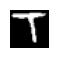

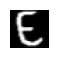

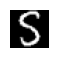

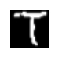

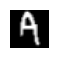

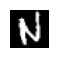

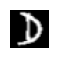

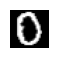

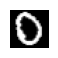

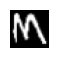

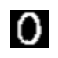

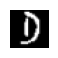

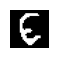

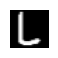

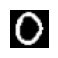

In [79]:
for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)
    if (min_w <= w <= max_w) and (min_h <= h <= max_h):
        process_box(gray, x, y, w, h)

In [80]:
characters[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

In [81]:
boxes = [box[1] for box in characters]
boxes

[(89, 123, 40, 35),
 (139, 123, 26, 34),
 (174, 121, 25, 37),
 (205, 120, 31, 30),
 (246, 120, 21, 33),
 (272, 114, 24, 36),
 (304, 114, 26, 34),
 (335, 116, 21, 27),
 (388, 114, 23, 27),
 (444, 110, 29, 26),
 (473, 111, 18, 23),
 (496, 108, 20, 30),
 (520, 107, 20, 28),
 (551, 104, 20, 29),
 (580, 105, 23, 26)]

In [82]:
pixels = np.array([pixel[0] for pixel in characters], dtype='float32')
pixels

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## Recognition of characters

In [83]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list = digits + letters
characters_list = [l for l in characters_list]

In [84]:
print(characters_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [85]:
pixels[0].shape

(28, 28, 1)

In [86]:
pixels.shape

(15, 28, 28, 1)

In [87]:
predictions = network.predict(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [88]:
predictions

array([[2.05405744e-15, 1.32476918e-10, 2.01504022e-14, 2.56222149e-12,
        8.95128644e-13, 1.09967608e-07, 1.79261801e-17, 4.07733181e-10,
        2.41679801e-11, 3.26203603e-14, 8.00175464e-12, 1.30835189e-13,
        5.97299632e-09, 6.86049655e-12, 1.10191760e-16, 2.31164588e-12,
        6.93710476e-08, 6.13895667e-14, 2.30533823e-14, 1.48407038e-04,
        1.97988239e-08, 8.50674364e-10, 1.50795514e-14, 9.14822329e-10,
        1.48816461e-08, 1.82035509e-09, 3.45330362e-11, 1.24010740e-14,
        3.20619087e-08, 9.99850214e-01, 7.75424041e-07, 1.77334886e-14,
        2.55567269e-11, 5.76062375e-12, 4.18187057e-07, 2.34168934e-12],
       [1.11021175e-12, 1.01642924e-12, 1.32890046e-10, 2.67814374e-16,
        8.44236053e-12, 5.87702971e-07, 8.98086000e-06, 1.72102069e-14,
        7.99229056e-08, 1.47282759e-11, 1.11700428e-12, 5.34200262e-06,
        6.98910299e-05, 1.81384567e-15, 9.99788105e-01, 5.97484250e-05,
        6.30796567e-05, 6.18257806e-11, 5.02799191e-11, 7.91607

In [89]:
predictions.shape, len(predictions), len(boxes)

((15, 36), 15, 15)

In [90]:
boxes

[(89, 123, 40, 35),
 (139, 123, 26, 34),
 (174, 121, 25, 37),
 (205, 120, 31, 30),
 (246, 120, 21, 33),
 (272, 114, 24, 36),
 (304, 114, 26, 34),
 (335, 116, 21, 27),
 (388, 114, 23, 27),
 (444, 110, 29, 26),
 (473, 111, 18, 23),
 (496, 108, 20, 30),
 (520, 107, 20, 28),
 (551, 104, 20, 29),
 (580, 105, 23, 26)]

In [91]:
img_copy = img.copy()

T: 1.00


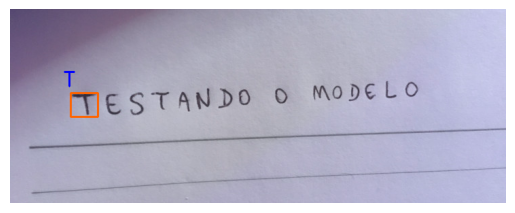

E: 1.00


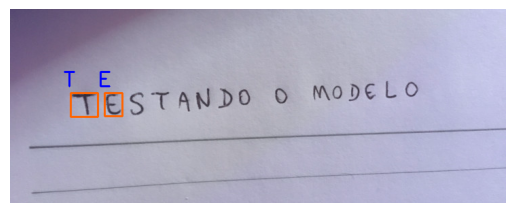

S: 0.54


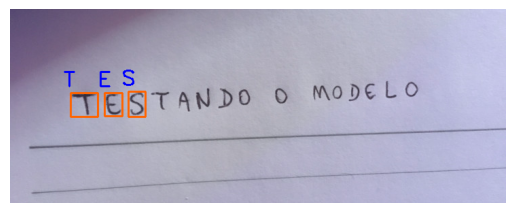

T: 1.00


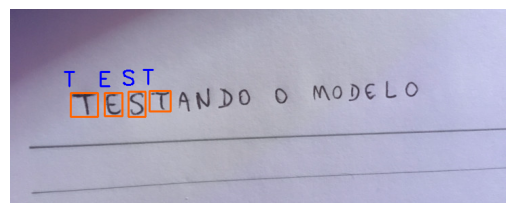

A: 1.00


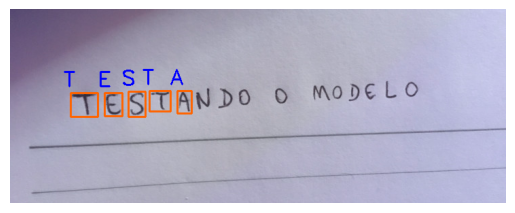

N: 1.00


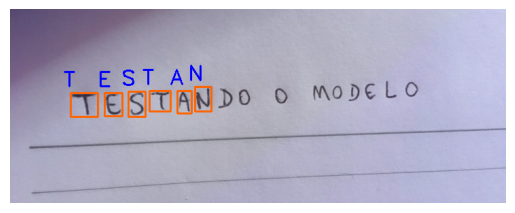

D: 1.00


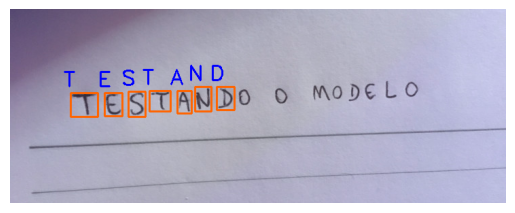

0: 0.66


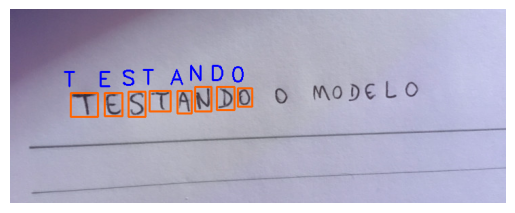

0: 0.61


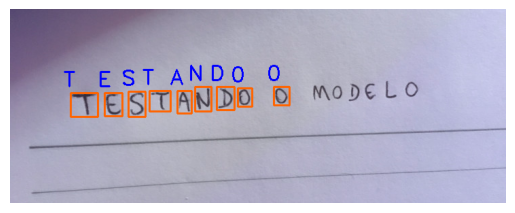

M: 1.00


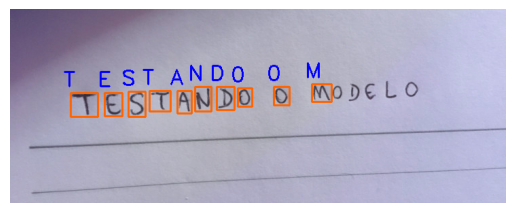

0: 0.84


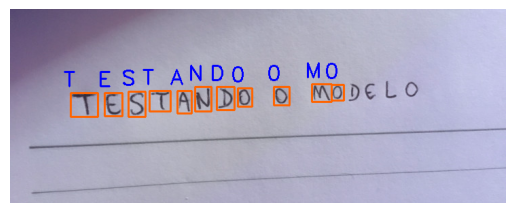

D: 1.00


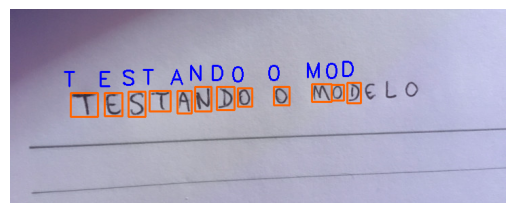

C: 0.38


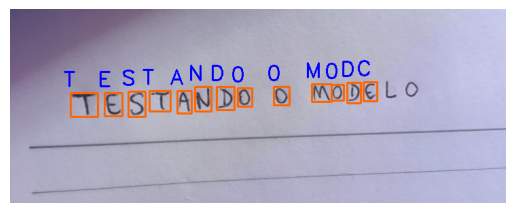

L: 1.00


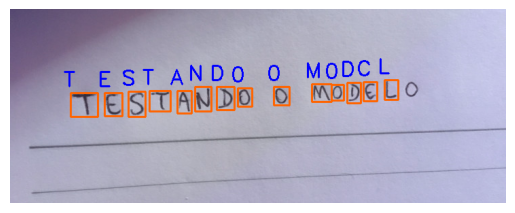

0: 0.66


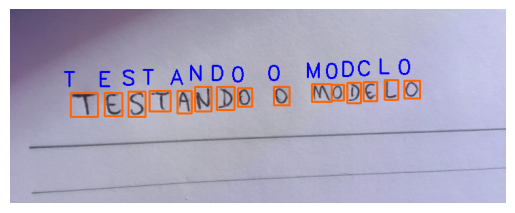

In [92]:
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
    i = np.argmax(prediction)
    probability = prediction[i]
    character = characters_list[i]
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 100, 0), 2)
    cv2.putText(img_copy, character, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    print(f'{character}: {probability:.2f}')
    plt.grid(False)
    plt.axis(False)
    plt.imshow(img_copy)
    plt.show()
    

In [97]:
## Add margin
def extract_roi(img, margin=2):
    roi = img[y - margin:y + h, x - margin:x + w + margin]
    return roi

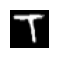

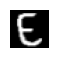

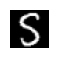

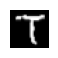

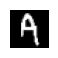

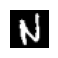

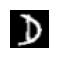

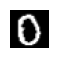

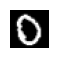

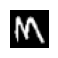

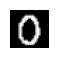

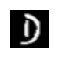

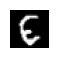

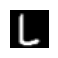

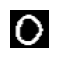

In [98]:
conts = find_contours(dilation.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (min_w <= w <= max_w) and (min_h <= h <= max_h):
    process_box(gray, x, y, w, h)

In [99]:
boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype='float32')
predictions = network.predict(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


T: 1.00


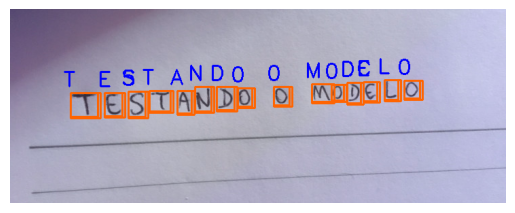

E: 1.00


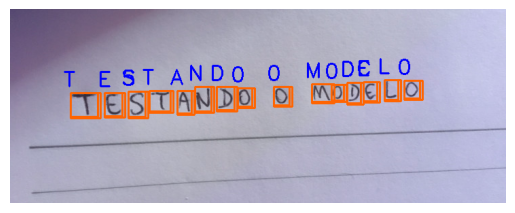

5: 0.89


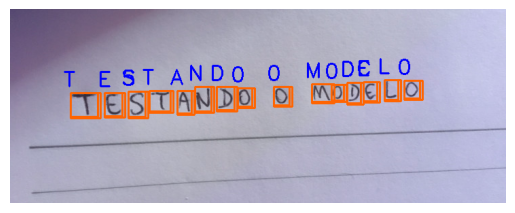

T: 1.00


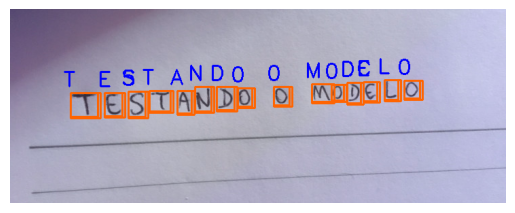

A: 0.99


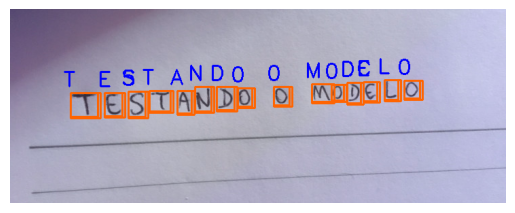

N: 1.00


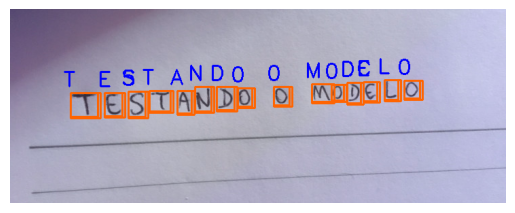

D: 1.00


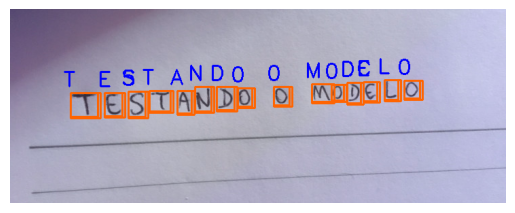

0: 0.86


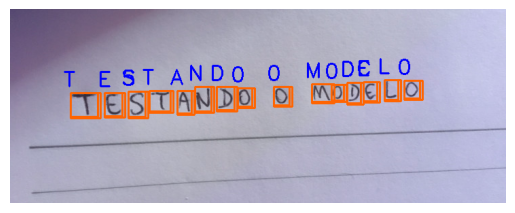

0: 0.91


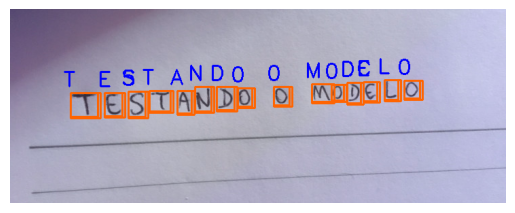

M: 1.00


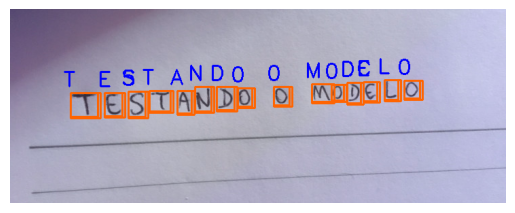

0: 0.69


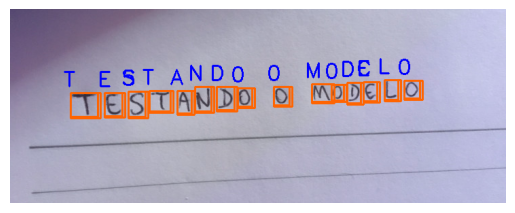

D: 1.00


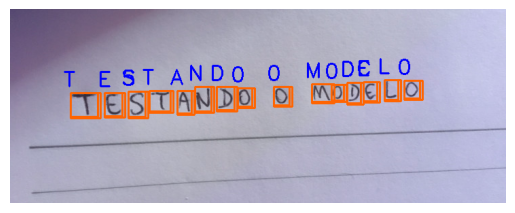

E: 0.83


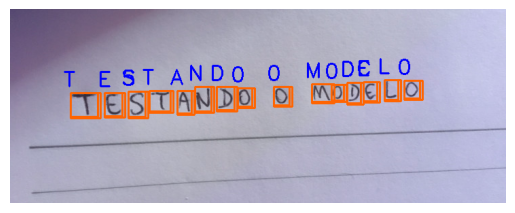

L: 1.00


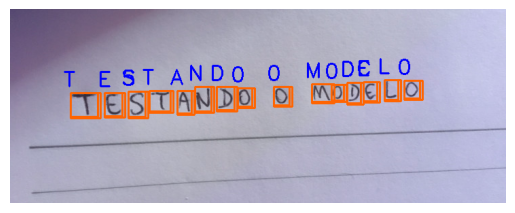

0: 0.74


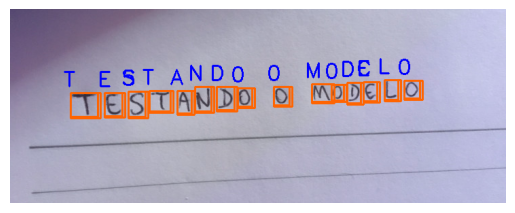

In [100]:
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
    i = np.argmax(prediction)
    probability = prediction[i]
    character = characters_list[i]
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 100, 0), 2)
    cv2.putText(img_copy, character, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    print(f'{character}: {probability:.2f}')
    plt.grid(False)
    plt.axis(False)
    plt.imshow(img_copy)
    plt.show()

## Other Tests

In [101]:
def preprocess_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 7)
    edges = cv2.Canny(blur, 40, 150)
    dilation = cv2.dilate(edges, np.ones((3, 3)))
    return gray, dilation

In [102]:
def prediction(predictions, characters_list):
    i = np.argmax(predictions)
    probability = predictions[i]
    character = characters_list[i]
    return i, probability, character

In [120]:
def draw_img(img_cp, character):
    cv2.rectangle(img_cp, (x, y), (x+w, y+h), (255, 100, 0), 2)
    cv2.putText(img_cp, character, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

In [133]:
def cv2_imshow(img, gray=True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.grid(False)
    plt.axis(False)
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

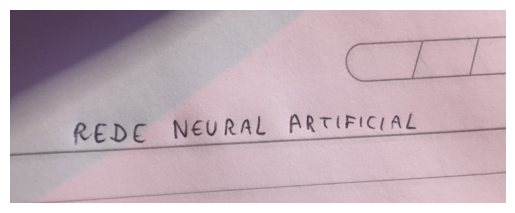

In [134]:
img = cv2.imread('Sources/Images/test_manuscript02.jpg')
cv2_imshow(img, gray=False)


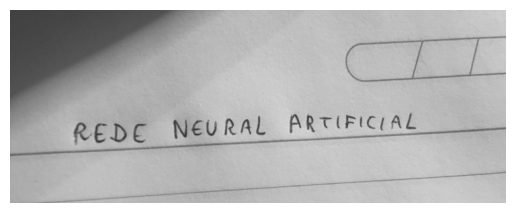

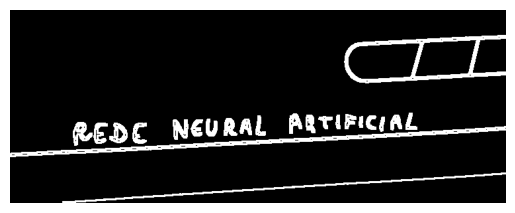

In [135]:
gray, processed_img = preprocess_img(img)
cv2_imshow(gray)
cv2_imshow(processed_img)

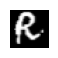

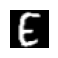

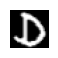

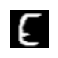

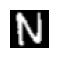

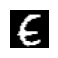

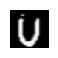

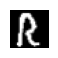

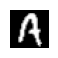

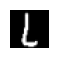

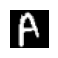

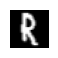

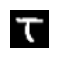

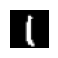

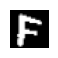

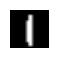

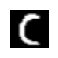

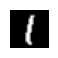

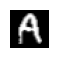

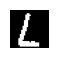

In [136]:
conts = find_contours(processed_img.copy())
characters = []
for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)
    if (min_w <= w <= max_w) and (min_h <= h <= max_h):
        process_box(gray, x, y, w, h)
    

In [137]:
boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype="float32")
predictions = network.predict(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [138]:
digits_2 = 'OI234S6789'
letters_2 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list_2 = digits_2 + letters_2
characters_list_2 = [l for l in characters_list_2]

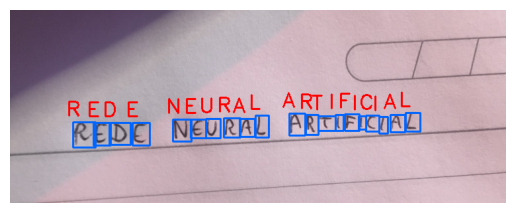

In [139]:
img_cp = img.copy()
for (pred, (x, y, w, h)) in zip(predictions, boxes):
    i, probability, character = prediction(pred, characters_list_2)
    draw_img(img_cp, character)
cv2_imshow(img_cp)

## Problems with undetected texts

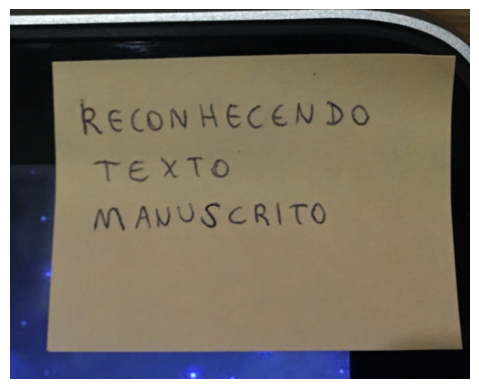

In [140]:
img = cv2.imread('Sources/Images/test_manuscript03.jpg')
cv2_imshow(img, gray=False)

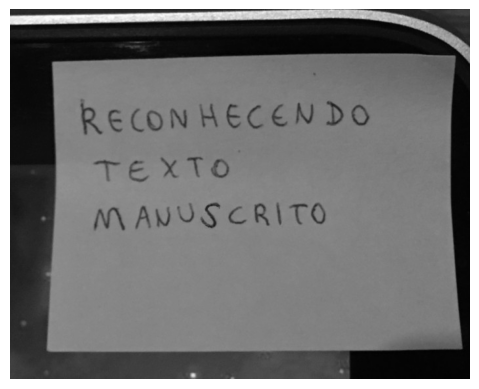

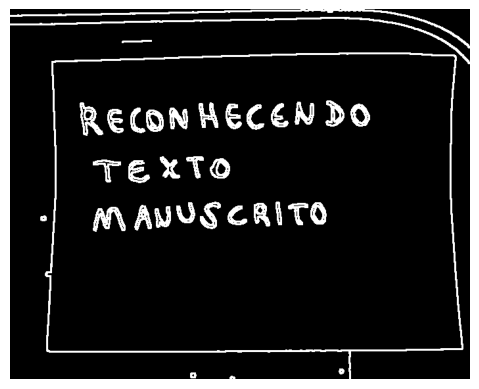

In [141]:
gray, processed_img = preprocess_img(img)
cv2_imshow(gray)
cv2_imshow(processed_img)

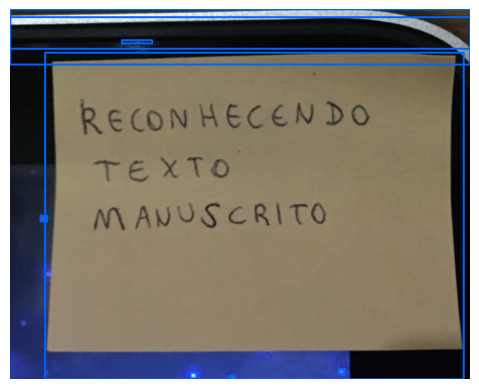

In [143]:
conts = find_contours(processed_img.copy())
img_cp = img.copy()
for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)
    roi = gray[y:y+h, x:x+w]
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2.rectangle(img_cp, (x,y), (x+w, y+h), (255, 100, 0), 2)
cv2_imshow(img_cp)

In [144]:
height, width = img_cp.shape[:2]
print(height, width)

563 700


In [146]:
contours_size = sorted(conts, key=cv2.contourArea, reverse=True)
contours_size

[array([[[500,  66]],
 
        [[499,  67]],
 
        [[435,  67]],
 
        [[434,  68]],
 
        [[397,  68]],
 
        [[396,  69]],
 
        [[363,  69]],
 
        [[362,  70]],
 
        [[321,  70]],
 
        [[320,  71]],
 
        [[292,  71]],
 
        [[291,  72]],
 
        [[256,  72]],
 
        [[255,  73]],
 
        [[234,  73]],
 
        [[233,  74]],
 
        [[203,  74]],
 
        [[202,  75]],
 
        [[167,  75]],
 
        [[166,  76]],
 
        [[138,  76]],
 
        [[137,  77]],
 
        [[ 98,  77]],
 
        [[ 97,  78]],
 
        [[ 68,  78]],
 
        [[ 67,  79]],
 
        [[ 63,  79]],
 
        [[ 63, 101]],
 
        [[ 64, 102]],
 
        [[ 64, 122]],
 
        [[ 65, 123]],
 
        [[ 65, 156]],
 
        [[ 66, 157]],
 
        [[ 66, 184]],
 
        [[ 67, 185]],
 
        [[ 67, 208]],
 
        [[ 68, 209]],
 
        [[ 68, 287]],
 
        [[ 67, 288]],
 
        [[ 67, 304]],
 
        [[ 66, 305]],
 
        [[ 66, 3

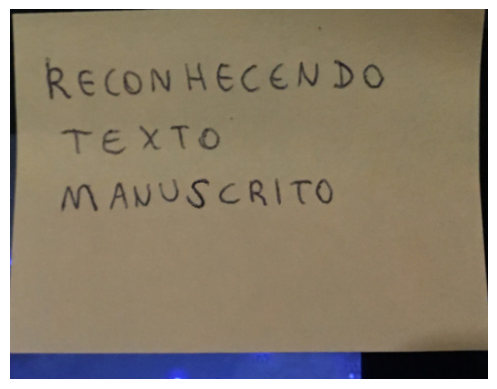

In [147]:
for c in contours_size:
    (x, y, w, h) = cv2.boundingRect(c)
    
    if (w >= (width/2)) and (h >= height/2):
        cut_off = 8
        cut_img = img[y+cut_off:y + h - cut_off, x+cut_off:x + w - cut_off]
        cv2_imshow(cut_img)

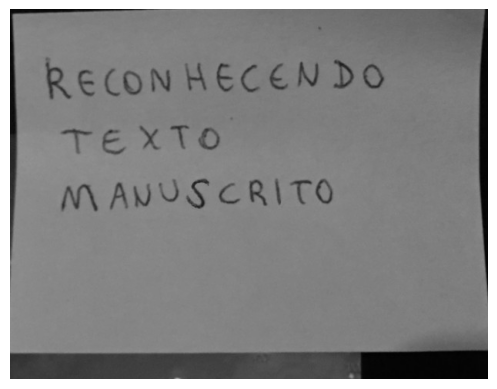

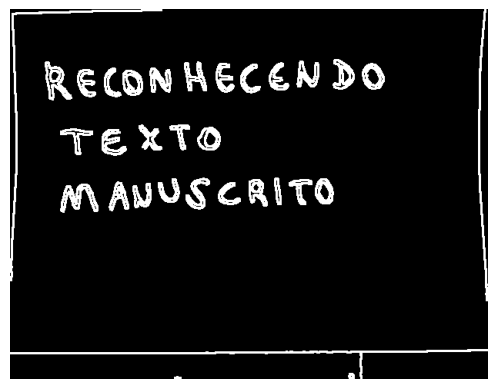

In [148]:
gray, processed_img = preprocess_img(cut_img)
cv2_imshow(gray)
cv2_imshow(processed_img)

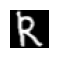

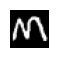

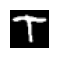

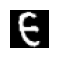

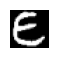

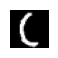

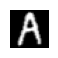

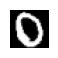

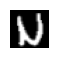

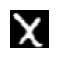

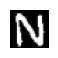

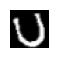

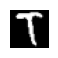

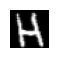

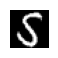

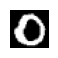

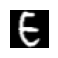

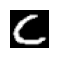

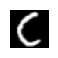

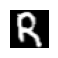

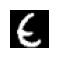

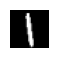

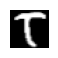

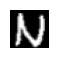

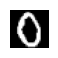

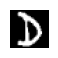

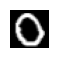

In [149]:
conts = find_contours(processed_img.copy())
characters = []
for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)
    if (min_w <= w <= max_w) and (min_h < h <= max_h):
        process_box(gray, x, y, w, h)

In [150]:
boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype='float32')
predictions = network.predict(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


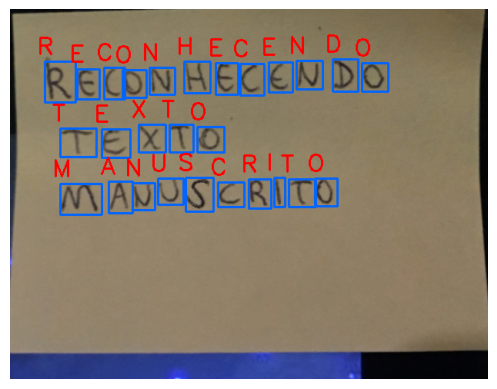

In [152]:
img_cp = cut_img.copy()
for (pred, (x, y, w, h)) in zip(predictions, boxes):
    i, probability, character = prediction(pred, characters_list_2)
    draw_img(img_cp, character)
cv2_imshow(img_cp)